# Customer Segmentation for Personalized Marketing

# Problem Statement

<font face="Arial" size="3"> Develop a model to segment customers based on purchasing behavior to 
enable targeted marketing strategies.</font>

# <font face="Arial" size="3"> 1. Business Understanding </font>
<font face="Arial" size="2"> Understanding the value derived from each customer is critical for business success. One effective approach to evaluating customer value is RFM analysis (Recency, Frequency, and Monetary value), which helps identify high-value customers based on their purchasing behavior.

Customer segmentation is the practice of categorizing a customer base into distinct groups based on shared characteristics such as demographics (age, gender), interests, and purchasing patterns. By leveraging RFM analysis, businesses can segment customers based on their engagement levels—ranking them from most valuable (frequent, high-spending, and recently active customers) to least valuable (infrequent, low-spending, and inactive customers).

This segmentation enables businesses to tailor their marketing strategies, optimize customer retention efforts, and drive higher revenue by focusing on high-potential segments while re-engaging less active customers with targeted incenti </font>ves.


# <font face="Arial" size="3"> 2. Dataset Description </font>

<font face="Arial" size="2">This dataset contains all transactions made between December 1, 2010, and December 9, 2011, for a UK-based, non-store online retail company. <br> </font>

<font face="Arial" size="2"><b>Column Names: Description</b>

Country: Country name. Name of the country where each customer resides.

CustomerID: Customer number. Uniquely assigned to each customer.

Description: Product name. 

InvoiceDate: Invoice Date and time. Day and time when each transaction was generated.

InvoiceNo: Invoice number. Six-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

Quantity: Quantities of each product per transaction.

StockCode: Product code. Five-digit integral number uniquely assigned to each distinct product.

UnitPrice: Unit price. Product price per unit.</font>

In [32]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

# This reads the Excel file into a pandas DataFrame.
data = pd.read_excel(r"C:\Users\User\OneDrive\Desktop\Capstone_Cust_Segmentation\online-retail.xlsx")

# <font face="Arial" size="3"> 3. Data Inspection and Data Munging </font>

In [34]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [36]:
data.select_dtypes(include=['number']).describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# <font face="Arial" size="3"> <bold>  Examine the dataset for missing values and develop an appropriate strategy to handle them. </bold> </font>
<font face="Arial" size="2">Customer ID and description having missing values. </font>

In [40]:
# Assuming 'data' is already defined, with your dataset.
typecol = ['Categorical', 'Categorical', 'Categorical', 'Discrete', 'Date', 'Continuous', 'Categorical', 'Categorical']

# Create the missing values DataFrame
missingdf = pd.DataFrame({'Columns': data.columns.to_list(), 'Type of data': typecol, 'No of missing data': data.isna().sum()})

# Function to highlight the max number of missing values
def highlight_max(s):
    is_max = s == s.max()  # Find the maximum number of missing values
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the highlight and hide the index
missingdf.style.apply(highlight_max, subset=['No of missing data']).hide(axis="index")



Columns,Type of data,No of missing data
InvoiceNo,Categorical,0
StockCode,Categorical,0
Description,Categorical,1454
Quantity,Discrete,0
InvoiceDate,Date,0
UnitPrice,Continuous,0
CustomerID,Categorical,135080
Country,Categorical,0


# <font face="Arial" size="3"> <bold> Handling Missing Data </bold> </font> 
 <font face="Arial" size="2"><li>We will remove all records where the CustomerID is missing, as it is essential for analysis.</li>
<li>Since the Description column will be automatically handled when we drop records with missing CustomerID, no additional action is needed for rows with missing Description.</li>
<li>After this treatment, there will be no missing values in either the CustomerID or Description columns.</li> </font>

In [42]:
# Print the number of records before dropping the rows where 'CustomerID' is missing
print("No of records before dropping customer ID column")
print(len(data))

# Drop rows where 'CustomerID' is missing
data.drop(data[data['CustomerID'].isna()].index, inplace=True)

# Reset the index after dropping the rows
data.reset_index(drop=True, inplace=True)

# Print the number of records after dropping the rows
print("No of records after dropping customer ID column")
print(len(data))

# Check if there is any missing data in the 'Description' column after cleaning
print("Is there any missing data in Description column after dropping the Null Customer ID columns")
print(any(data['Description'].isna()))

# Create a DataFrame showing the number of missing data in each column after cleaning
missingdf = pd.DataFrame({
    'Columns': data.columns.to_list(),
    'No of missing data after cleaning': data.isna().sum()
})

# Apply the highlight_max function to highlight the max missing data and hide the index
missingdf.style.apply(highlight_max, subset=['No of missing data after cleaning']).hide(axis="index")




No of records before dropping customer ID column
541909
No of records after dropping customer ID column
406829
Is there any missing data in Description column after dropping the Null Customer ID columns
False


Columns,No of missing data after cleaning
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


# <font face="Arial" size="3"> Dropping duplicate records from dataset </font> 

In [44]:
# Print the number of records before dropping duplicates
print("No of records before dropping duplicate records")
print(len(data))

# Drop duplicate records
data.drop_duplicates(inplace=True)

# Reset the index after dropping duplicates
data.reset_index(drop=True, inplace=True)

# Print the number of records after dropping duplicates
print("No of records after dropping duplicate records")
print(len(data))


No of records before dropping duplicate records
406829
No of records after dropping duplicate records
401604


# <font face="Arial" size="3"> Eliminate the transactions from the last month of 2011, as there is data available for only 9 days. </font>

In [46]:
# Define a function that will parse the date
import datetime
def get_month(x):
    return datetime.datetime(x.year,x.month,x.day) 
print ("No of records before dropping the transactions of the last month")
print (len(data))

# Create InvoiceMonth column
data['InvoiceMonth'] = data['InvoiceDate'].apply(get_month)
data[data['InvoiceMonth'] > datetime.datetime(2011,11,30)]
data.drop(data[data['InvoiceMonth'] > datetime.datetime(2011,11,30)].index, inplace = True)

data.reset_index(drop=True)
print ("No of records after dropping the transactions of the last month")
print (len(data))

No of records before dropping the transactions of the last month
401604
No of records after dropping the transactions of the last month
384222


# <font face="Arial" size="3"> 4. Exploratory Data Analysis </font>

# <font face="Arial" size="3"> Descriptive Analysis of the given data </font>
<font face="Arial" size="2"> Countries with the Highest Number of Customers </font>

In [48]:
data.Country.value_counts(normalize=True).head(10).mul(100).round(2).astype(str) + ' %'

Country
United Kingdom    88.73 %
Germany            2.38 %
France             2.12 %
EIRE               1.86 %
Spain              0.64 %
Netherlands        0.59 %
Belgium            0.51 %
Switzerland        0.49 %
Portugal           0.36 %
Australia          0.33 %
Name: proportion, dtype: object

<Axes: xlabel='InvoiceDate'>

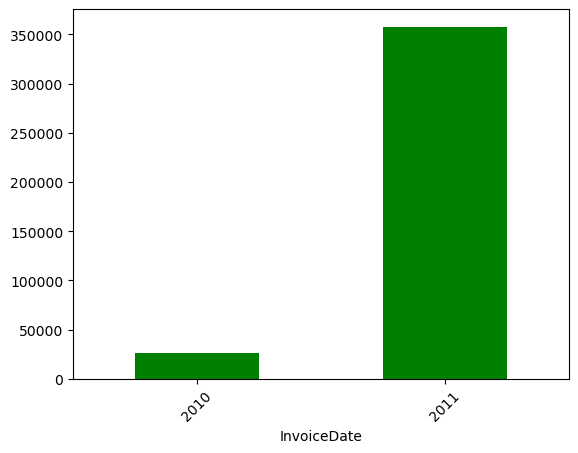

In [50]:
data.InvoiceDate.dt.year.value_counts(sort=False).plot(kind='bar', rot=45, color='green')

# <font face="Arial" size="2">Monthly Customer Trend in 2011 </font>

<Axes: xlabel='InvoiceDate'>

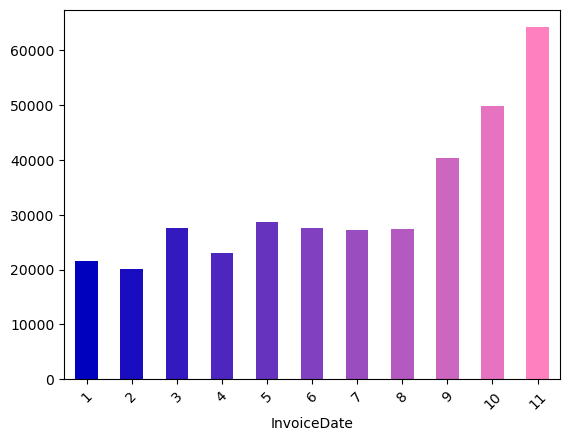

In [52]:
my_colors = [(min(x/10.0, 1), min(x/20.0, 1), 0.75) for x in range(len(data[data.InvoiceDate.dt.year==2011].InvoiceDate.dt.month.value_counts(sort=False)))]
data[data.InvoiceDate.dt.year==2011].InvoiceDate.dt.month.value_counts(sort=False).plot(kind='bar', rot=45, color=my_colors)

# <font face="Arial" size="2">Items Contributing to the Maximum Price Value </font>

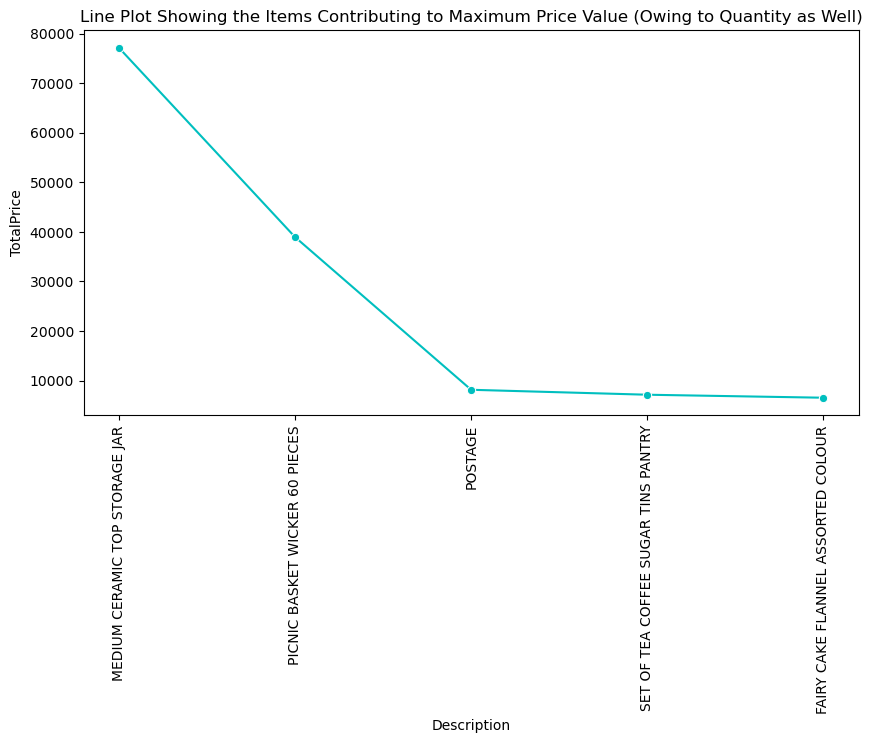

In [54]:
# Assuming 'data' is your DataFrame and contains 'Quantity' and 'UnitPrice'
data['TotalPrice'] = data.Quantity * data.UnitPrice

# Sort data by 'TotalPrice' and get the top 5 items
desc = data.sort_values(by='TotalPrice', ascending=False)['Description'].head(5)
price = data.sort_values(by='TotalPrice', ascending=False)['TotalPrice'].head(5)

# Create the plot
plt.figure(figsize=(10, 5))
sns.lineplot(y=price, x=desc, marker='o', color='c')

# Set the title of the plot
plt.title('Line Plot Showing the Items Contributing to Maximum Price Value (Owing to Quantity as Well)')

# Adjust x-ticks to match the number of items
plt.xticks(range(len(desc)), desc, rotation=90)

# Show the plot
plt.show()

# <font face="Arial" size="2">First and Last Business Transaction Date</font>

In [56]:
print ("First business transaction date is {}".format(data.InvoiceDate.min()))
print ("Last business transaction  date is {}".format(data.InvoiceDate.max()))
monthly_gross =data[data.InvoiceDate.dt.year==2011].groupby(data.InvoiceDate.dt.month).TotalPrice.sum()
df = pd.DataFrame(monthly_gross)
df.index.name = 'Invoice Month'
df


First business transaction date is 2010-12-01 08:26:00
Last business transaction  date is 2011-11-30 17:42:00


,TotalPrice
Invoice Month,
1,473731.900
2,435534.070
3,578576.210
4,425222.671
5,647011.670
6,606862.520
7,573112.321
8,615078.090
9,929356.232


# <font face="Arial" size="2">Total Price by Invoice Month</font>

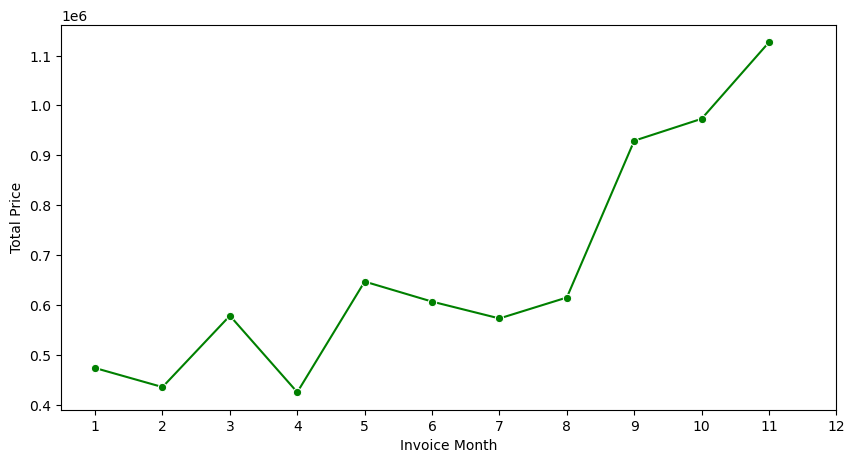

In [58]:
plt.figure(figsize=(10,5))
sns.lineplot(y=monthly_gross.values,x=monthly_gross.index, marker='o', color='g');
plt.xlabel('Invoice Month')
plt.ylabel('Total Price')
plt.xticks(range(1,13))
plt.show();

# <font face="Arial" size="2">Top 20 products</font>

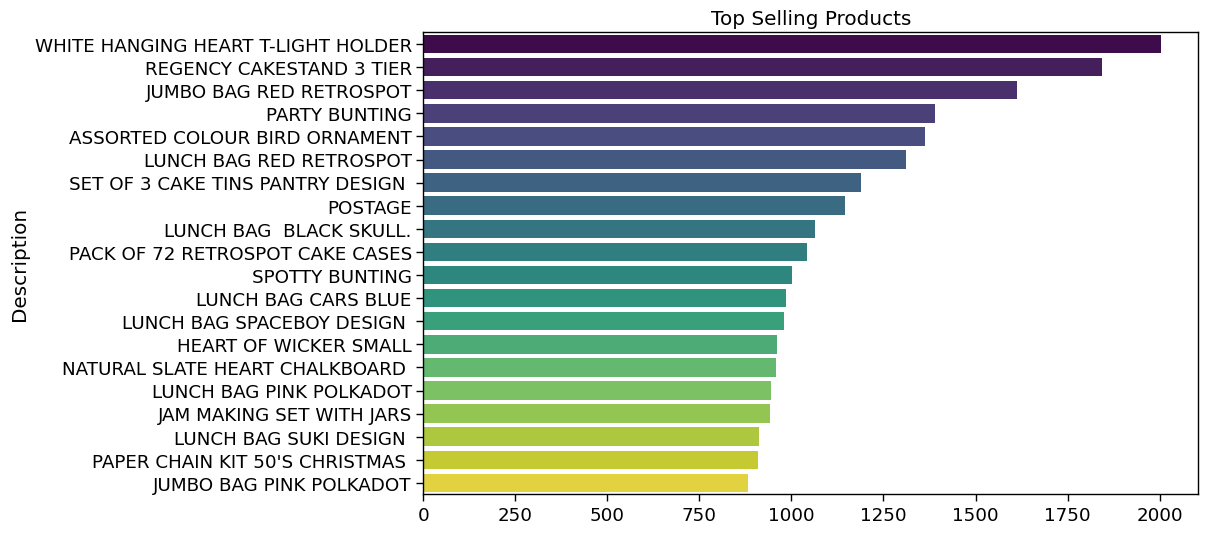

In [60]:


top_products = data['Description'].value_counts()[:20]

# Set the figure size and style
plt.figure(figsize=(10, 6))

# Set context for the plot to adjust the font scale
sns.set_context("paper", font_scale=1.5)

# Generate a list of colors using a colormap (e.g., 'viridis', 'plasma', 'coolwarm', etc.)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_products)))

# Convert numpy array to a list for the palette
colors_list = colors.tolist()

# Create the barplot with a different color for each bar using 'hue'
sns.barplot(y=top_products.index, x=top_products.values, hue=top_products.index, palette=colors_list, dodge=False)

# Add a title
plt.title("Top Selling Products")

# Display the plot
plt.show()

In [62]:
pd.DataFrame(data['Description'].value_counts())

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2005
REGENCY CAKESTAND 3 TIER,1843
JUMBO BAG RED RETROSPOT,1613
PARTY BUNTING,1391
ASSORTED COLOUR BIRD ORNAMENT,1363
...,...
PINK FLOCK PHOTO FRAME,1
BLING KEY RING STAND,1
LASER CUT MULTI STRAND NECKLACE,1


# <font face="Arial" size="3">Cohort Analysis</font>

In [64]:
cohort =data.copy()
cohort

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
...,...,...,...,...,...,...,...,...,...,...
384217,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676.0,United Kingdom,2011-11-30,-0.85
384218,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676.0,United Kingdom,2011-11-30,-3.29
384219,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717.0,United Kingdom,2011-11-30,-1.25
384220,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,16717.0,United Kingdom,2011-11-30,-7.95


# <font face="Arial" size="2">To begin cohort analysis, the first step is to define cohorts. In this case, we will create monthly cohorts based on the month in which each customer made their very first transaction. This means that each customer will be assigned to a specific cohort corresponding to the month they made their initial purchase.</font>

In [66]:
# Define a function that will parse the date
def get_month(x):
    return datetime.datetime(x.year,x.month,1) 

# Create InvoiceMonth column
cohort['InvoiceMonth'] = cohort['InvoiceDate'].apply(get_month) 

# Group by CustomerID and select the InvoiceMonth value
grouping = cohort.groupby('CustomerID')['InvoiceMonth']

# Assign a minimum InvoiceMonth value to the dataset
cohort['CohortMonth'] = grouping.transform('min')

In [251]:
cohort

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...
384217,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676.0,United Kingdom,2011-11-01,-0.85,2011-03-01
384218,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676.0,United Kingdom,2011-11-01,-3.29,2011-03-01
384219,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717.0,United Kingdom,2011-11-01,-1.25,2010-12-01
384220,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,16717.0,United Kingdom,2011-11-01,-7.95,2010-12-01


# <font face="Arial" size="2">To calculate the time offset in months, we need to measure the difference between each transaction and the customer's first transaction. This will allow us to report metrics for each cohort in a consistent way.

First, we will define a function called get_date_int() that extracts the integer values for the year and month from both the Invoice Date and Cohort Date. These integer values will help us compute the time difference in months. </font>

In [68]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

# Get the integers for date parts from the `InvoiceMonth` column
invoice_year, invoice_month = get_date_int(cohort,'InvoiceMonth')

# Get the integers for date parts from the `CohortMonth` column
cohort_year, cohort_month = get_date_int(cohort,'CohortMonth')

In [70]:
print ("Unique terms for Cohort Year is {} " .format(cohort_year.unique()))
print ("Unique terms for Cohort Month is {} " .format(cohort_month.unique()))
print ("Unique terms for Invoice Year is {} " .format(invoice_year.unique()))
print ("Unique terms for Invoice Year is {} " .format(invoice_month.unique()))


Unique terms for Cohort Year is [2010 2011] 
Unique terms for Cohort Month is [12  1  2  3  4  5  6  7  8  9 10 11] 
Unique terms for Invoice Year is [2010 2011] 
Unique terms for Invoice Year is [12  1  2  3  4  5  6  7  8  9 10 11] 


In [72]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Extract the difference in months from all previous values
cohort['CohortIndex'] = years_diff * 12 + months_diff + 1

In [189]:
#THis Cohort Index will give us an idea on the time difference in months between the customer's first purchase and the customer's current purchase
cohort['CohortIndex'].unique()
cohort

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
384217,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676.0,United Kingdom,2011-11-01,-0.85,2011-03-01,9
384218,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676.0,United Kingdom,2011-11-01,-3.29,2011-03-01,9
384219,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717.0,United Kingdom,2011-11-01,-1.25,2010-12-01,12
384220,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,16717.0,United Kingdom,2011-11-01,-7.95,2010-12-01,12


# <font face="Arial" size="2"> Deriving Retention Rate
Customer retention is a valuable metric that helps you assess how many of your customers remain active over time. It shows the percentage of active customers relative to the total number of customers, providing insight into customer loyalty and ongoing engagement. </font>

In [74]:
grouping = cohort.groupby(['CohortMonth', 'CohortIndex'])

In [76]:
# Count the number of unique values per customer ID
#cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)*100
#print (cohort[cohort['CohortMonth']=='2011-12-01']['CustomerID'].nunique()) #Verifies 41 against this month
#cohort_sizes
retention.index = retention.index.date


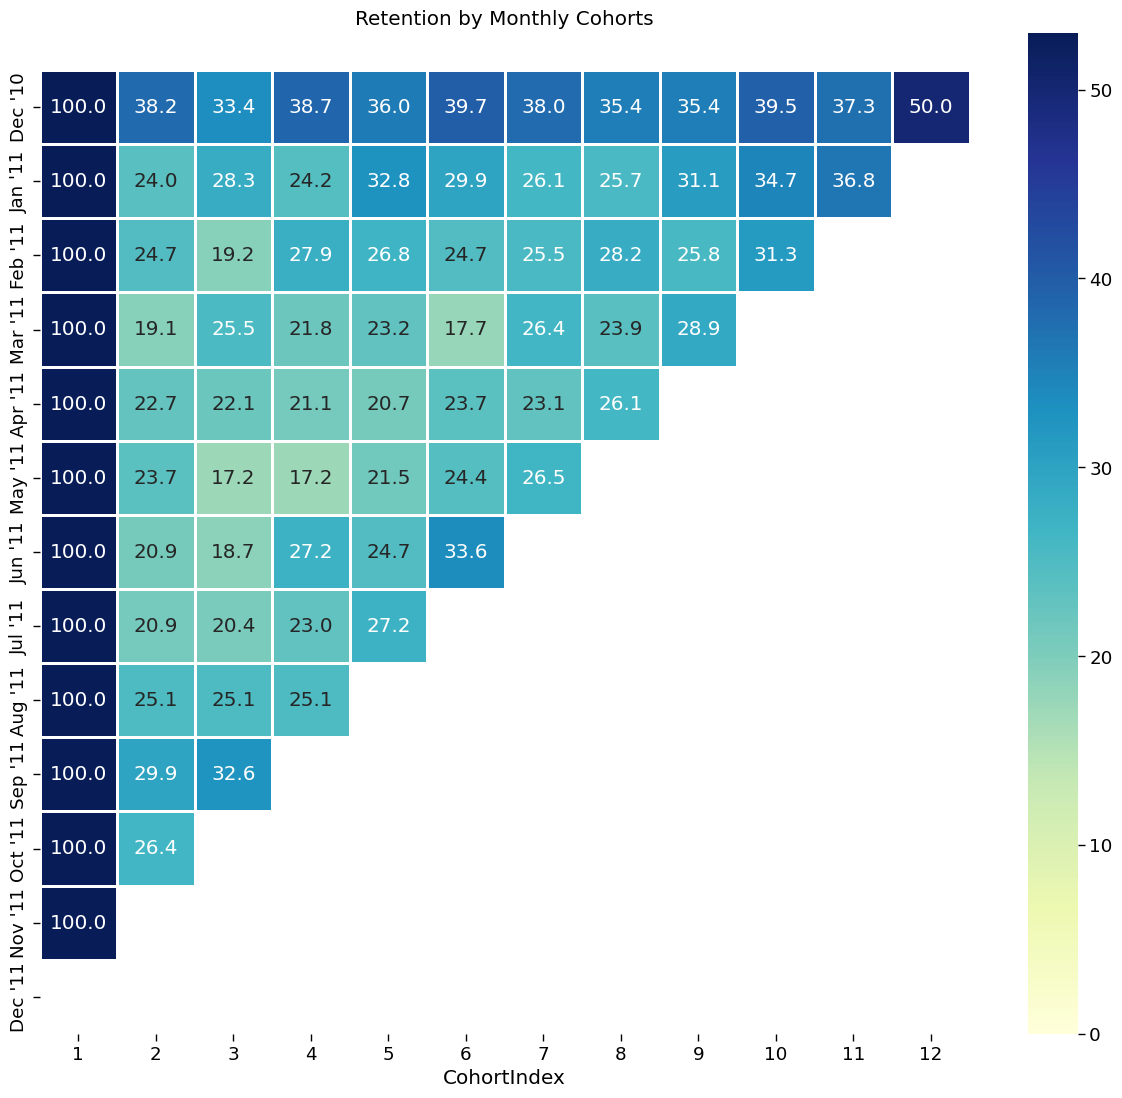

<Figure size 640x480 with 0 Axes>

In [78]:
month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11",\
              "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]

# Initialize inches plot figure
plt.figure(figsize=(15,13))

# Add a title
plt.title('Retention by Monthly Cohorts')

# Create the heatmap
ax = sns.heatmap(data=retention,
            annot = True,
            cmap = "YlGnBu",
            vmin = 0.0,
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.9,
            yticklabels=month_list)

# plot of the data
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
fig = plt.figure()
plt.show();

# <font face="Arial" size="2"> Deriving Average Price Per Cohort
Calculating the average price metric and analyzing if there are any differences in shopping patterns across time and across cohorts</font>

In [80]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = cohort.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
#average_price.round(1)
#average_price.index = average_price.index.date
average_price
#cohort_data
#cohort

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2010-12-01,3.216682,3.182040,3.207467,3.603758,2.937803,4.996508,3.184572,3.235695,3.511560,3.035982,3.309705,2.835557
2011-01-01,3.505492,3.653572,3.069534,8.439024,3.157803,3.172919,2.918498,2.749649,2.641686,5.489040,2.886220,NaN
2011-02-01,3.355968,4.469638,4.824106,3.150045,2.987616,2.792577,2.812985,3.214380,2.894988,2.946092,NaN,NaN
2011-03-01,3.302802,4.990095,3.655094,3.289768,3.616562,2.758381,2.843273,2.809136,2.707846,NaN,NaN,NaN
2011-04-01,3.431172,3.958074,3.300128,2.673439,3.028297,2.867185,2.902668,2.812492,NaN,NaN,NaN,NaN
2011-05-01,4.662054,3.243691,2.652761,3.167391,2.667158,2.495751,2.615408,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.490030,3.205283,3.343994,2.835952,2.553037,3.550657,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,4.493676,3.480495,2.752121,2.701985,2.403989,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,3.028246,5.425904,5.714033,7.046410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


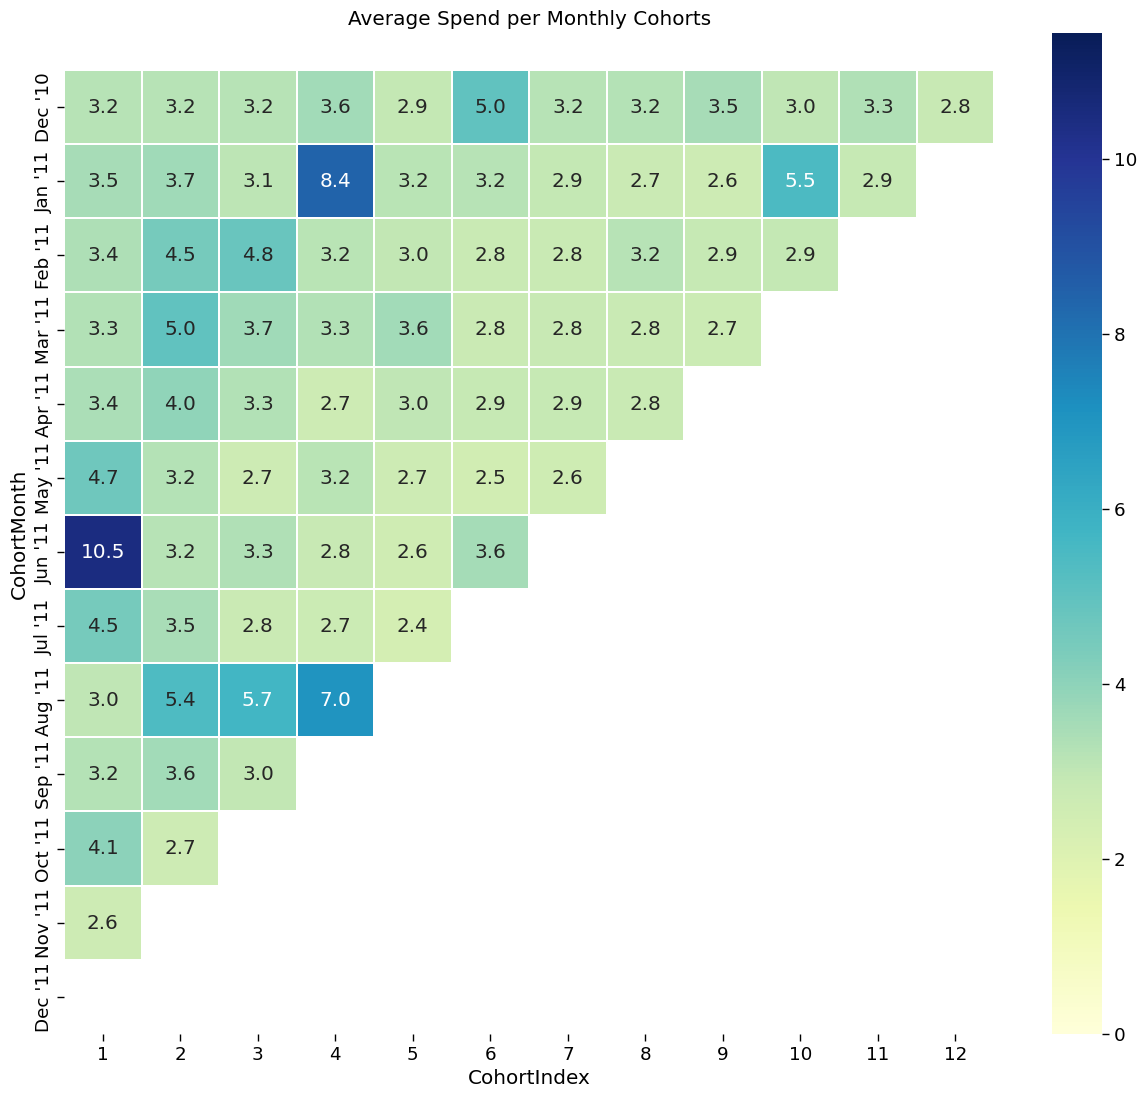

In [82]:
# Initialize plot figure
plt.figure(figsize=(15, 13))

plt.title('Average Spend per Monthly Cohorts')
# Create the heatmap
ax = sns.heatmap(data = average_price,
            annot=True,
            vmin = 0.0,
#             vmax =20,
            cmap='YlGnBu',
            vmax = list(average_price.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show();

# <font face="Arial" size="2"> Deriving Average Quantity Per Cohort
Calculating the average quantity metric and analyze if there are any differences in shopping patterns across time and across cohorts. </font>

In [84]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = cohort.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the Quantity column
cohort_data = grouping['Quantity'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')
average_quantity.round(1)
average_quantity.index = average_quantity.index.date


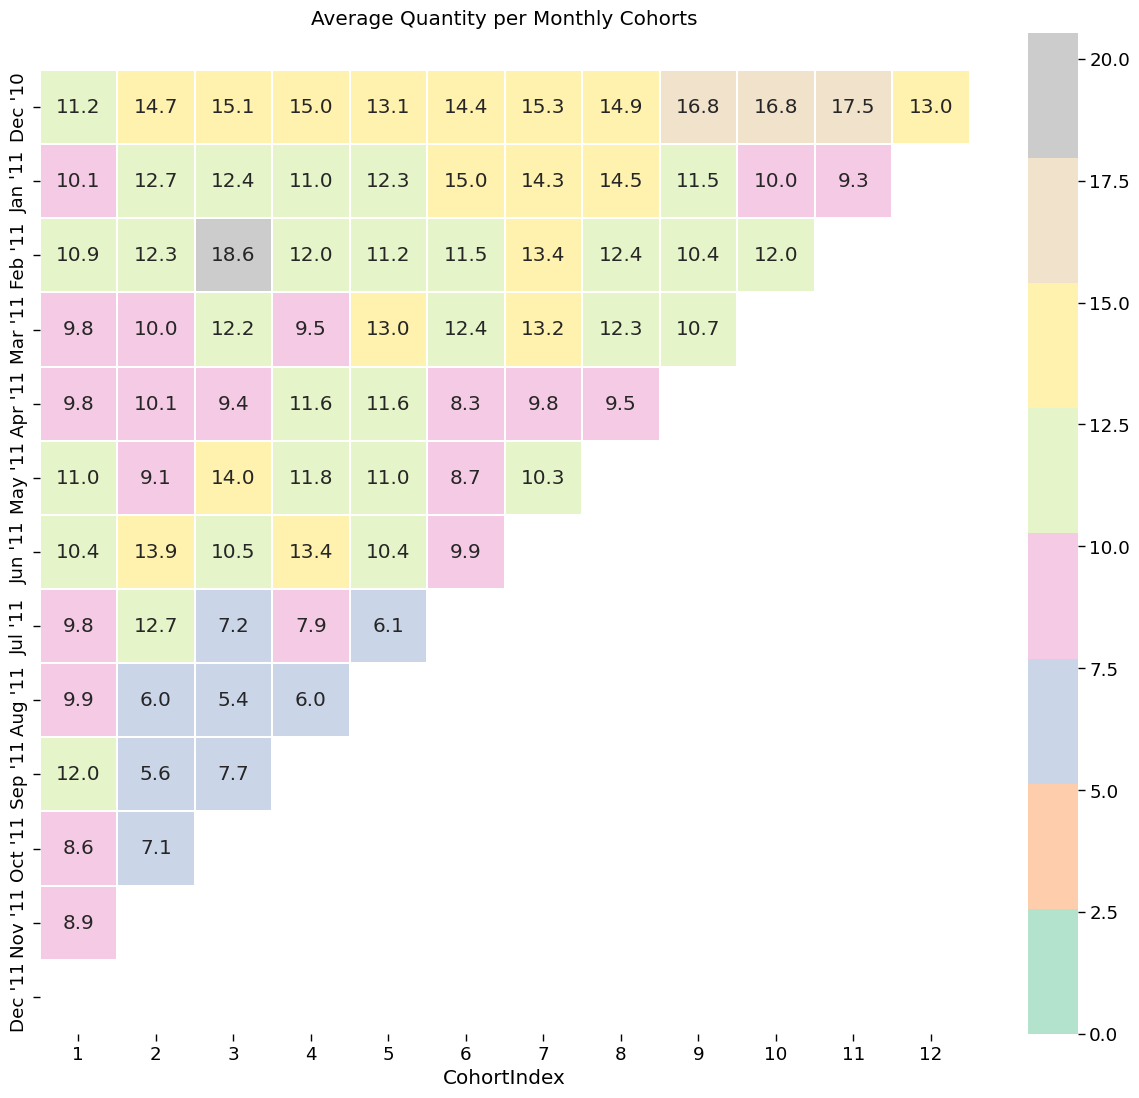

In [86]:
# Initialize plot figure
plt.figure(figsize=(15, 13))

# Add a title
plt.title('Average Quantity per Monthly Cohorts')

# Create the heatmap
ax  = sns.heatmap(data = average_quantity,
            annot=True,
            vmin = 0.0,
            cmap='Pastel2',
            vmax = list(average_quantity.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show();

# <font face="Arial" size="3"> 5. Feature Engineering </font>

<font face="Arial" size="2">Feature engineering is a crucial step in customer segmentation for personalized marketing. It involves creating new features from raw data that can help to better understand customer behavior and identify patterns that can drive personalized marketing strategies. 
Behavioral Features:
<li>Purchase Frequency: How often a customer buys from the store.</li>
<li>Recency of Purchase: How recent a customer’s last purchase was, helping identify loyal customers or those at risk of churn.</li>
<li>Monetary Value (RFM Analysis): How much a customer has spent over time. It helps to categorize customers into high-value, medium-value, and low-value groups.</li></font>

<font face="Arial" size="2"><br> RFM analysis is a customer segmentation method that leverages historical purchase behavior to group customers. It helps categorize customers into different segments, making it easier to identify those who are more likely to engage with promotions and can benefit from personalized services in the future.</font>

<font face="Arial" size="2"><b>Benefits of RFM Analysis:</b>

<li>Improved customer retention</li>

<li>Higher response rates</li>

<li>Increased conversion rates</li>

<li>Boosted revenue</li>

To conduct RFM analysis, customers are divided into four equal groups based on the distribution of recency, frequency, and monetary value. With four groups for each of the three variables, this results in 64 (4x4x4) unique customer segments, a manageable number to work with.

For instance, consider a customer who:

<li>Belongs to the group with the most recent purchases (R=4)</li>

<li>Is in the group with the highest frequency of purchases (F=4)</li>

<li>Falls into the group with the highest spending (M=4)</li>

This customer would be placed in the RFM segment 4-4-4, also known as the "Best Customers" segment (R=4, F=4, M=4).</font>

In [88]:
Segment =  ['Platinum Customers',
                     'Big Spenders',
                     'High Spend New Customers',
                     'Lowest-Spending Active Loyal Customers',
                     'Recent Customers',
                     'Good Customers Almost Lost', 
                     'Churned Best Customers',
                     'Lost Cheap Customers ']
RFM = [ 
               ['444', '443'],
               ['114', '124', '134', '144', '214', '224', '234', '244', '314', '324', '334', '344', '414', '424', '434', '444'],
               ['413', '314', '313', '414'],
               ['331', '341', '431', '441'],
               ['422', '423', '424', '432', '433', '434', '442', '443', '444'], 
               ['244', '234', '243', '233'], 
               ['144', '134', '143', '133'], 
               ['122', '111', '121', '112', '221', '212', '211']
               ]
# Dictionary for each segment to map them against each customer
Description = ['Customers who bought most recently, most often and spend the most',
               'Customers who spend the most',
               'New Customers who spend the most',
               'Active Customers who buy very often but spend less ',
               'Customers who have purchased recently',
               'Customers who were frequent and good spenders who are becoming very inactive',
               'Customers who were frequent and good spenders who are lost contributing to attrition',
               'Customers who purchased long ago , less frequent and very little']

Marketing = ['No price incentives, New products and Loyalty Programs',
                      'Market your most expensive products',
                      'Price Incentives',
                      'Promote economical cost effective products in daily use',
                      'Discounts and promote a variety of product sells',
                      'Aggressive Price Incentives',
                      'Monitor close communication with customers with constant feedback and rework ',
                      'Dont spend too much time to re-acquire',
                      ]
rfm_segments = pd.DataFrame({'Segment': Segment , 'RFM' : RFM , 'Description': Description, 'Marketing': Marketing})
rfm_segments

,Segment,RFM,Description,Marketing
0,Platinum Customers,"[444, 443]","Customers who bought most recently, most often...","No price incentives, New products and Loyalty ..."
1,Big Spenders,"[114, 124, 134, 144, 214, 224, 234, 244, 314, ...",Customers who spend the most,Market your most expensive products
2,High Spend New Customers,"[413, 314, 313, 414]",New Customers who spend the most,Price Incentives
3,Lowest-Spending Active Loyal Customers,"[331, 341, 431, 441]",Active Customers who buy very often but spend ...,Promote economical cost effective products in ...
4,Recent Customers,"[422, 423, 424, 432, 433, 434, 442, 443, 444]",Customers who have purchased recently,Discounts and promote a variety of product sells
5,Good Customers Almost Lost,"[244, 234, 243, 233]",Customers who were frequent and good spenders ...,Aggressive Price Incentives
6,Churned Best Customers,"[144, 134, 143, 133]",Customers who were frequent and good spenders ...,Monitor close communication with customers wit...
7,Lost Cheap Customers,"[122, 111, 121, 112, 221, 212, 211]","Customers who purchased long ago , less freque...",Dont spend too much time to re-acquire


<font face="Arial" size="2"> <b> Recency </b><br>
Recency refers to the time since a customer’s most recent order. It measures the number of days that have passed since the last purchase. For a website or app, this could be interpreted as the number of days since the customer’s last visit or login.</font>

In [90]:
#last date available in our dataset
import datetime as dt
data['InvoiceDate'].max()

Timestamp('2011-11-30 17:42:00')

In [92]:
# Lets set this date as the today's date for further analysis
current_date = dt.date(2011,11,30)
current_date

datetime.date(2011, 11, 30)

In [94]:
data['Purchase_Date'] = data.InvoiceDate.dt.date

In [96]:
recency = data.groupby('CustomerID')['Purchase_Date'].max().reset_index()
recency

,CustomerID,Purchase_Date
0,12346.0,2011-01-18
1,12347.0,2011-10-31
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4326,18280.0,2011-03-07
4327,18281.0,2011-06-12
4328,18282.0,2011-08-09
4329,18283.0,2011-11-30


In [98]:
# Create a separate column for this date.
recency = recency.assign(Current_Date = current_date)
recency

,CustomerID,Purchase_Date,Current_Date
0,12346.0,2011-01-18,2011-11-30
1,12347.0,2011-10-31,2011-11-30
2,12348.0,2011-09-25,2011-11-30
3,12349.0,2011-11-21,2011-11-30
4,12350.0,2011-02-02,2011-11-30
...,...,...,...
4326,18280.0,2011-03-07,2011-11-30
4327,18281.0,2011-06-12,2011-11-30
4328,18282.0,2011-08-09,2011-11-30
4329,18283.0,2011-11-30,2011-11-30


In [100]:
# Compute the number of days since last purchase
recency['Recency'] = recency.Purchase_Date.apply(lambda x: (current_date - x).days)
current_date

datetime.date(2011, 11, 30)

In [102]:
recency.head()

,CustomerID,Purchase_Date,Current_Date,Recency
0,12346.0,2011-01-18,2011-11-30,316
1,12347.0,2011-10-31,2011-11-30,30
2,12348.0,2011-09-25,2011-11-30,66
3,12349.0,2011-11-21,2011-11-30,9
4,12350.0,2011-02-02,2011-11-30,301


In [104]:
# Drop the irrelevant Date columns
recency.drop(['Purchase_Date','Current_Date'], axis=1, inplace=True)
recency

,CustomerID,Recency
0,12346.0,316
1,12347.0,30
2,12348.0,66
3,12349.0,9
4,12350.0,301
...,...,...
4326,18280.0,268
4327,18281.0,171
4328,18282.0,113
4329,18283.0,0


<font face="Arial" size="2"> <b> Frequency </b><br>
Frequency refers to the number of purchases a customer makes within a specific time frame, such as 3 months, 6 months, or 1 year. It helps us understand how often or how many times a customer engages with a company's product. A higher frequency indicates more frequent customer engagement. However, high frequency alone doesn’t necessarily mean a customer is an elite customer. We also need to consider how much the customer spends on each purchase, which is where monetary value comes into play.</font>

In [106]:
frequency = data.groupby('CustomerID').InvoiceNo.nunique().reset_index().rename(columns={'InvoiceNo':'Frequency'})
frequency.max()

CustomerID    18287.0
Frequency       238.0
dtype: float64

<font face="Arial" size="2"> <b> Monetary </b><br>
Monetary refers to the total amount of money a customer spends within a specific time period. As a result, high spenders are distinguished from other customers and may be classified as prime customer or an elite customer.</font>

In [108]:
# Create a separate column for Total Cost of Unit purchased
data['Total_cost'] = data.Quantity * data.UnitPrice
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,Purchase_Date,Total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
384217,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676.0,United Kingdom,2011-11-30,-0.85,2011-11-30,-0.85
384218,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676.0,United Kingdom,2011-11-30,-3.29,2011-11-30,-3.29
384219,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717.0,United Kingdom,2011-11-30,-1.25,2011-11-30,-1.25
384220,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,16717.0,United Kingdom,2011-11-30,-7.95,2011-11-30,-7.95


In [110]:
monetary = data.groupby('CustomerID').Total_cost.sum().reset_index().rename(columns={'Total_cost':'Monetary'})
monetary.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4085.18
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


<font face="Arial" size="2">Combining Recency, Frequency and Monetary attributes to form an aggregated RFM table. </font>

In [112]:
rf = recency.merge(frequency, on='CustomerID')
rfm_table = rf.merge(monetary, on='CustomerID')

In [114]:
rfm_table.set_index('CustomerID',inplace=True)
rfm_table.head()
#rfm_table.Monetary.max()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,316,2,0.00
12347.0,30,6,4085.18
12348.0,66,4,1797.24
12349.0,9,1,1757.55
12350.0,301,1,334.40


<font face="Arial" size="2"><b>RFM Table Integrity Check</b><br>
Let's verify if the attributes in the RFM table align with the original values.</font>

In [116]:
rfm_table.index[1]

12347.0

In [118]:
# Fetch the records corresponding to the first customer id in above table
data[data.CustomerID == rfm_table.index[1]]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,Purchase_Date,Total_cost
10408,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010-12-07,25.2,2010-12-07,25.2
10409,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010-12-07,17.0,2010-12-07,17.0
10410,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010-12-07,39.0,2010-12-07,39.0
10411,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,Iceland,2010-12-07,23.4,2010-12-07,23.4
10412,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,2010-12-07,15.0,2010-12-07,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
318826,573511,22196,SMALL HEART MEASURING SPOONS,24,2011-10-31 12:25:00,0.85,12347.0,Iceland,2011-10-31,20.4,2011-10-31,20.4
318827,573511,22195,LARGE HEART MEASURING SPOONS,24,2011-10-31 12:25:00,1.65,12347.0,Iceland,2011-10-31,39.6,2011-10-31,39.6
318828,573511,20719,WOODLAND CHARLOTTE BAG,10,2011-10-31 12:25:00,0.85,12347.0,Iceland,2011-10-31,8.5,2011-10-31,8.5
318829,573511,23162,REGENCY TEA STRAINER,8,2011-10-31 12:25:00,3.75,12347.0,Iceland,2011-10-31,30.0,2011-10-31,30.0


<font face="Arial" size="2"><b>Customer segments with RFM Model</b><br>
The easiest way to create customer segments using the RFM model is by applying quantiles. We assign a score from 1 to 4 for Recency, Frequency, and Monetary, with 4 representing the best or highest value and 1 representing the lowest or worst value. The final RFM score is then calculated by combining the individual scores for Recency, Frequency, and Monetary.
</font>

In [120]:
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,15.0,1.0,288.755
0.50,48.0,3.0,628.780
0.75,144.0,5.0,1545.905


In [122]:
# Let's convert quartile information into a dictionary so that cutoffs can be picked up.
quantiles=quantiles.to_dict()
quantiles
rfm_table

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,316,2,0.00
12347.0,30,6,4085.18
12348.0,66,4,1797.24
12349.0,9,1,1757.55
12350.0,301,1,334.40
...,...,...,...
18280.0,268,1,180.60
18281.0,171,1,80.82
18282.0,113,2,98.76


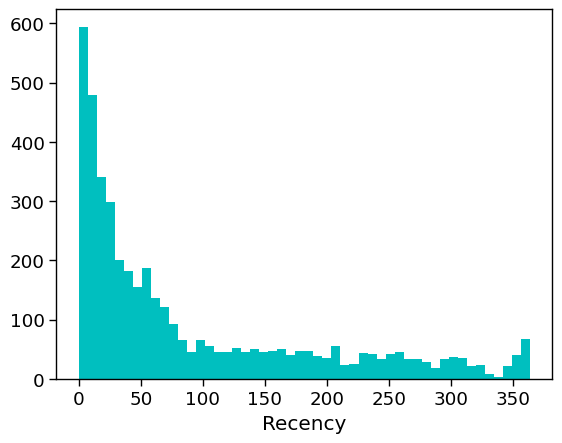

In [124]:
#Let us visualize the histogram charts for Recency, Frequency and Monetary
plt.hist(rfm_table.Recency, bins = 50, color='c')
plt.xlabel('Recency')
plt.show()

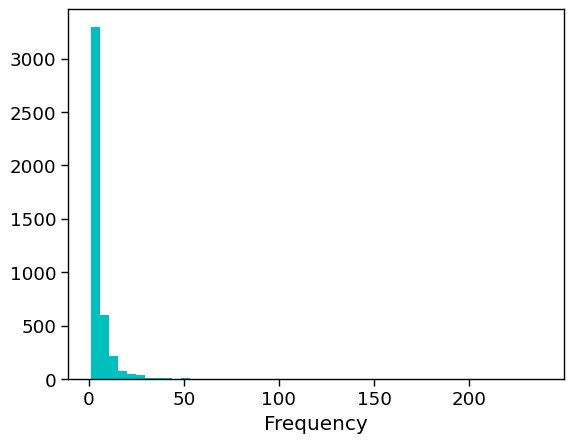

In [126]:
plt.hist(rfm_table.Frequency, bins = 50, color='c')
plt.xlabel('Frequency')
plt.show()

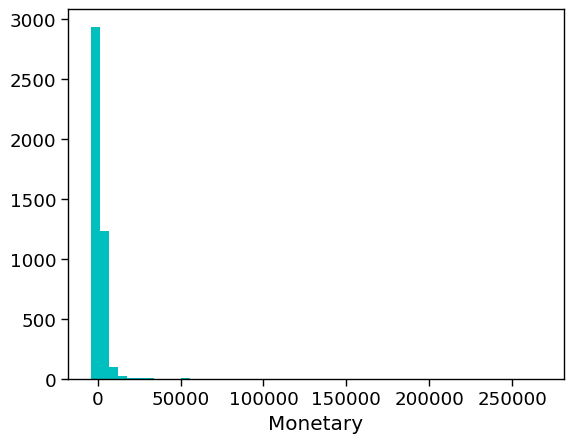

In [128]:
plt.hist(rfm_table.Monetary, bins = 50, color='c')
plt.xlabel('Monetary')
plt.show()

<font face="Arial" size="2"><b>RFM Segments Creation</b><br>
We will create two segmentation classes because high recency is considered unfavorable, while high frequency and monetary value are seen as positive indicators.</font>

In [130]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quantiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quantiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
rfm_segment = rfm_table.copy()
rfm_segment['R_Quartile'] = rfm_segment['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segment['F_Quartile'] = rfm_segment['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segment['M_Quartile'] = rfm_segment['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [132]:
rfm_segment.head()
rfm_segment[rfm_segment.Monetary == rfm_segment.Monetary.max()]
rfm_segment

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346.0,316,2,0.00,1,2,1
12347.0,30,6,4085.18,3,4,4
12348.0,66,4,1797.24,2,3,4
12349.0,9,1,1757.55,4,1,4
12350.0,301,1,334.40,1,1,2
...,...,...,...,...,...,...
18280.0,268,1,180.60,1,1,1
18281.0,171,1,80.82,1,1,1
18282.0,113,2,98.76,2,2,1


<font face="Arial" size="2">To analyze the data, it's important to combine the scores into a single value. One way to do this is by simply combining the scores into a 3-digit number ranging from 111 to 444. However, the downside of this method is that it creates too many categories (4x4x4).</font>

In [134]:
rfm_segment['RFMScore'] = rfm_segment.R_Quartile.map(str) \
                            + rfm_segment.F_Quartile.map(str) \
                            + rfm_segment.M_Quartile.map(str)
rfm_segment.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12346.0,316,2,0.00,1,2,1,121
12347.0,30,6,4085.18,3,4,4,344
12348.0,66,4,1797.24,2,3,4,234
12349.0,9,1,1757.55,4,1,4,414
12350.0,301,1,334.40,1,1,2,112


<font face="Arial" size="2"><b>RFM Segment Allocation</b><br>
Let's define customer segments based on the RFM scores and assign each customer to the appropriate segment accordingly.</font>

<font face="Arial" size="2">Best Recency Score = 4: This represents customers who made their most recent purchase in the shortest amount of time, indicating high engagement.

Best Frequency Score = 4: This represents customers who make purchases most frequently, showing strong and consistent buying behavior.

Best Monetary Score = 4: This indicates customers who have spent the most money, highlighting their high value to the business.</font>

In [136]:
rfm_segment.reset_index(inplace=True)

In [138]:
import itertools

# Highest frequency as well as monetary value with least recencycy
platinum_customers = ['444', '443']
print ("Platinum Customers                     : {}".format(platinum_customers)) 

# Get all combinations of [1, 2, 3,4] and length 2 
big_spenders_comb =  itertools.product([1, 2, 3,4],repeat = 2)   
# Print the obtained combinations 
big_spenders = []
for i in list(big_spenders_comb): 
    item = (list(i))
    item.append(4)
    big_spenders.append( ("".join(map(str,item))))
print ("Big Spenders                           : {}".format(big_spenders))

#High-spending New Customers – This group consists of those customers in 1-4-1 and 1-4-2.
#These are customers who transacted only once, but very recently and they spent a lot

high_spend_new_customers = ['413', '314' ,'313','414'] 
print ("High Spend New Customers               : {}".format(high_spend_new_customers)) 


lowest_spending_active_loyal_customers_comb =  itertools.product([ 3,4], repeat = 2)
lowest_spending_active_loyal_customers = []
for i in list(lowest_spending_active_loyal_customers_comb): 
    item = (list(i))
    item.append(1)
    lowest_spending_active_loyal_customers.append( ("".join(map(str,item))))
print ("Lowest Spending Active Loyal Customers : {}".format(lowest_spending_active_loyal_customers))

recent_customers_comb =  itertools.product([ 2,3,4], repeat = 2)
recent_customers = []
for i in list(recent_customers_comb): 
    item = (list(i))
    item.insert(0,4)
    recent_customers.append( ("".join(map(str,item))))
print ("Recent Customers                       : {}".format(recent_customers))




almost_lost = ['244', '234', '243', '233']        #  Low R - Customer's shopping less often now who used to shop a lot  
print ("Good Customers Almost Lost             : {}".format(almost_lost)) 

churned_best_customers = ['144', '134' ,'143','133'] 
print ("Churned Best Customers                 : {}".format(churned_best_customers)) 


lost_cheap_customers = ['122','111' ,'121','112','221','212' ,'211'] # Customer's shopped long ago but with less frequency and monetary value
print ("Lost Cheap Customers                   : {}".format(lost_cheap_customers))

Platinum Customers                     : ['444', '443']
Big Spenders                           : ['114', '124', '134', '144', '214', '224', '234', '244', '314', '324', '334', '344', '414', '424', '434', '444']
High Spend New Customers               : ['413', '314', '313', '414']
Lowest Spending Active Loyal Customers : ['331', '341', '431', '441']
Recent Customers                       : ['422', '423', '424', '432', '433', '434', '442', '443', '444']
Good Customers Almost Lost             : ['244', '234', '243', '233']
Churned Best Customers                 : ['144', '134', '143', '133']
Lost Cheap Customers                   : ['122', '111', '121', '112', '221', '212', '211']


In [140]:
# Dictionary for each segment to map them against each customer
segment_dict = {
    'Platinum Customers':platinum_customers,      
    'Big Spenders':      big_spenders,
    'High Spend New Customers':high_spend_new_customers,
    'Lowest-Spending Active Loyal Customers' : lowest_spending_active_loyal_customers ,
    'Recent Customers': recent_customers,
    'Good Customers Almost Lost':almost_lost,       
    'Churned Best Customers':   churned_best_customers, 
    'Lost Cheap Customers ': lost_cheap_customers, 
}

In [142]:
# Allocate segments to each customer as per the RFM score mapping
def find_key(value):
    for k, v in segment_dict.items():
        if value in v:
            return k

rfm_segment['Segment'] = rfm_segment.RFMScore.map(find_key)

# Allocate all remaining customers to 'others' segment category
rfm_segment['Segment'] = rfm_segment['Segment'].fillna('others')

rfm_segment.sample(10)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
1421,14286.0,14,5,4595.81,4,3,4,434,Big Spenders
2029,15122.0,76,6,1612.13,2,4,4,244,Big Spenders
1788,14788.0,17,1,368.45,3,1,2,312,others
3042,16497.0,40,6,2965.69,3,4,4,344,Big Spenders
747,13341.0,251,1,775.85,1,1,3,113,others
3208,16735.0,69,7,2216.06,2,4,4,244,Big Spenders
124,12505.0,292,1,-4.50,1,1,1,111,Lost Cheap Customers
4294,18235.0,62,3,1796.48,2,2,4,224,Big Spenders
1323,14146.0,72,5,1724.41,2,3,4,234,Big Spenders
865,13507.0,89,3,2022.79,2,2,4,224,Big Spenders


<font face="Arial" size="2">Let's visualize the different customer segments to answer key questions for the retail business, such as:

<li>Who are the biggest spenders?</li>

<li>Which customers are at risk of churning?</li>

<li>Who are the lost customers that require less attention?</li>

<li>Who are my loyal customers?</li>

<li>Which customers are crucial to retain?</li>

<li>Which customers have the potential to become more profitable?</li>

<li>Which customer group is most likely to respond to the current campaign?</li></font>

In [144]:
# Best Customers who's recency, frequency as well as monetary attribute is highest.
rfm_segment[rfm_segment.RFMScore=='444'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
1685,14646.0,7,74,267761.00,4,4,4,444,Platinum Customers
4193,18102.0,2,59,244952.95,4,4,4,444,Platinum Customers
3722,17450.0,1,54,185759.77,4,4,4,444,Platinum Customers
1876,14911.0,0,238,125482.36,4,4,4,444,Platinum Customers
54,12415.0,15,26,123725.45,4,4,4,444,Platinum Customers


In [146]:
# Biggest spenders
rfm_segment[rfm_segment.RFMScore=='334'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
2765,16126.0,20,4,6287.77,3,3,4,334,Big Spenders
12,12359.0,48,5,6274.23,3,3,4,334,Big Spenders
727,13316.0,28,5,5570.69,3,3,4,334,Big Spenders
2894,16303.0,16,4,5305.83,3,3,4,334,Big Spenders
2868,16258.0,36,5,5203.51,3,3,4,334,Big Spenders


In [148]:
# customers that you must retain are those whose monetary and frequency was high but recency reduced quite a lot recently
rfm_segment[rfm_segment.RFMScore=='244'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
457,12939.0,55,8,11581.80,2,4,4,244,Big Spenders
49,12409.0,69,7,11056.93,2,4,4,244,Big Spenders
2807,16180.0,91,10,10217.48,2,4,4,244,Big Spenders
1776,14769.0,68,9,10041.86,2,4,4,244,Big Spenders
3215,16745.0,77,18,7157.10,2,4,4,244,Big Spenders


In [150]:
rfm_segment.to_excel("D:/Desktop/Capstone/RFM Segment.xlsx")

# <font face="Arial" size="3"> 6. Preparation, Models and Evaluation </font>
<font face="Arial" size="2"> K-Means Clustering Algorithm<br>
K-Means is a clustering algorithm, is often referred to as a "model" in the context of unsupervised learning. K-means is used to partition a set of data points into a predefined number of clusters (k), based on their features. It assigns each data point to the cluster whose centroid (mean) is closest.</font>

<font face="Arial" size="2"><b>a. Data Preparation</b></font>


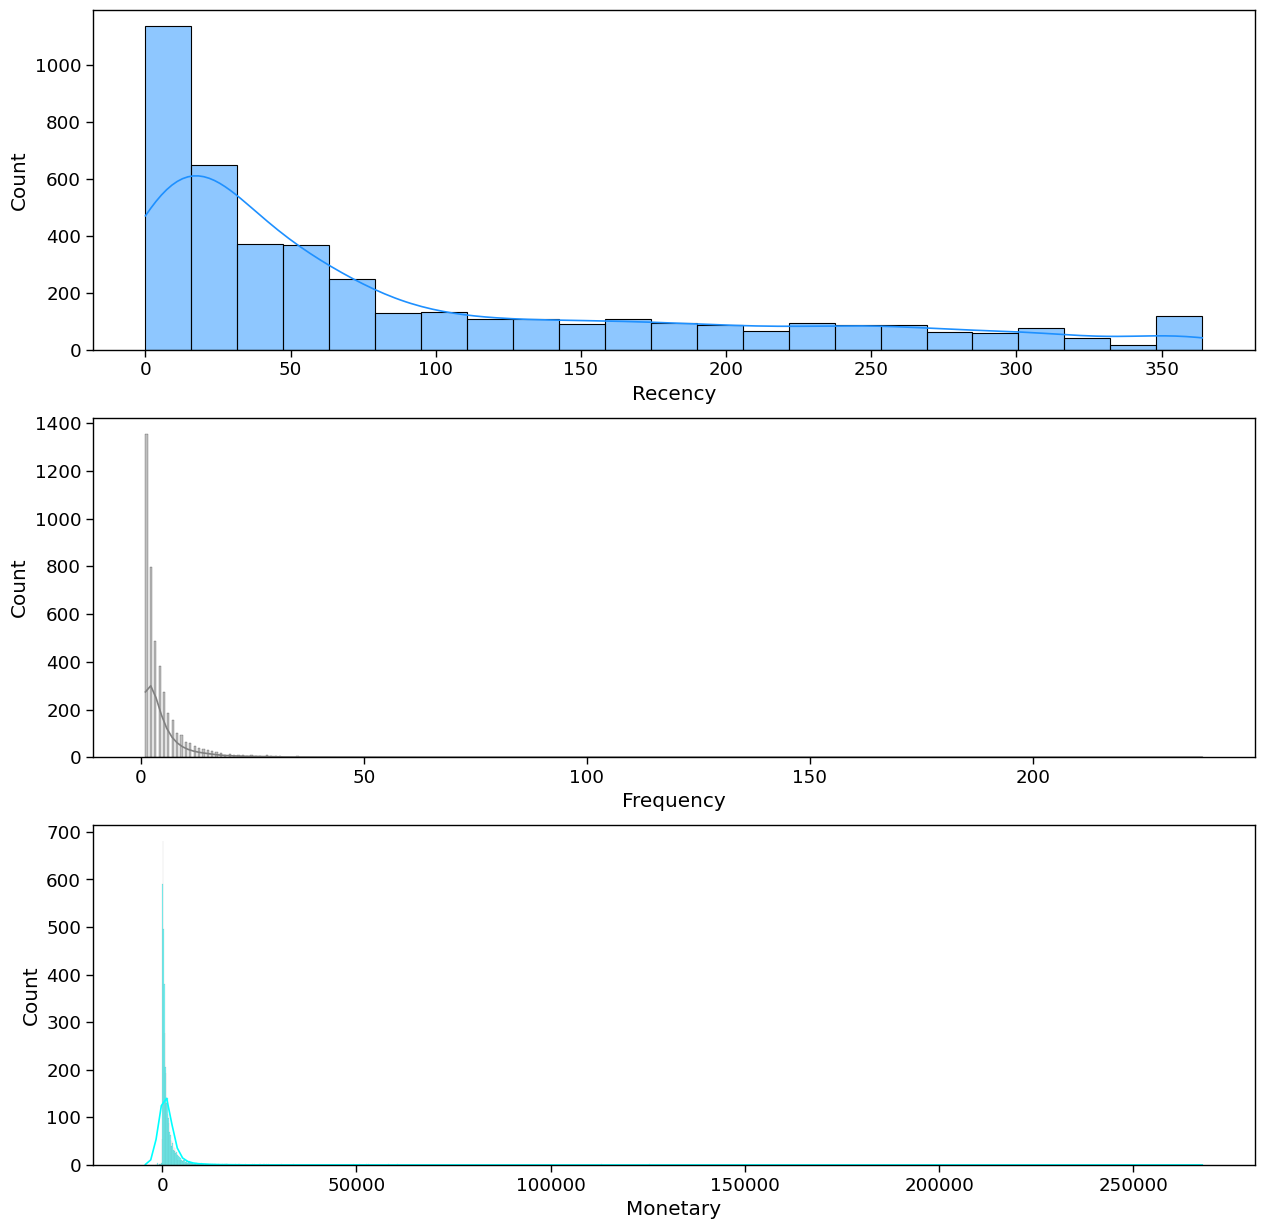

In [152]:
# Distribution plot
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(15, 15))

sns.histplot(rfm_table['Recency'], color="dodgerblue", ax=axes[0], kde=True)
axes[0].set_xlabel('Recency')

sns.histplot(rfm_table['Frequency'], color="grey", ax=axes[1], kde=True)
axes[1].set_xlabel('Frequency')

sns.histplot(rfm_table['Monetary'], color="cyan", ax=axes[2], kde=True)
axes[2].set_xlabel('Monetary')

plt.show()

In [154]:
# Let's describe the table to see if there are any negative values
rfm_table.describe()

,Recency,Frequency,Monetary
count,4331.000000,4331.000000,4331.000000
mean,90.277303,4.910875,1832.597551
std,99.389069,9.025901,7944.283177
min,0.000000,1.000000,-4287.630000
25%,15.000000,1.000000,288.755000
50%,48.000000,3.000000,628.780000
75%,144.000000,5.000000,1545.905000
max,364.000000,238.000000,267761.000000


<font face="Arial" size="2">We notice that the Monetary values contain negative values. To avoid issues in log transformation and ensure proper graph plotting or K-Means clustering, we first need to adjust the data so that the minimum value starts from 1. Once this is done, we can apply log transformation and scaling to prepare the data for K-Means clustering.</font>

In [156]:
# Create a copy of rfm table
rfm_table_scaled = rfm_table.copy()

# Shift all values in the column by adding absolute of minimum value to each value, thereby making each value positive.
rfm_table_scaled.Monetary = rfm_table_scaled.Monetary + abs(rfm_table_scaled.Monetary.min()) + 1
rfm_table_scaled.Recency = rfm_table_scaled.Recency + abs(rfm_table_scaled.Recency.min()) + 1

# Check the summary of new values
rfm_table_scaled.describe()

,Recency,Frequency,Monetary
count,4331.000000,4331.000000,4331.000000
mean,91.277303,4.910875,6121.227551
std,99.389069,9.025901,7944.283177
min,1.000000,1.000000,1.000000
25%,16.000000,1.000000,4577.385000
50%,49.000000,3.000000,4917.410000
75%,145.000000,5.000000,5834.535000
max,365.000000,238.000000,272049.630000


In [158]:
# Transform the data before K-Means clustering
from sklearn.preprocessing import StandardScaler

# Taking log first because normalization forces data for negative values
log_df = np.log(rfm_table_scaled)

# Normalize the data for uniform averages and means in the distribution.
scaler = StandardScaler()
normal_df = scaler.fit_transform(log_df)
normal_df = pd.DataFrame(data=normal_df, index=rfm_table.index, columns=rfm_table.columns)

In [160]:
normal_df

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.386976,-0.369465,-0.687546
12347.0,-0.198501,0.790665,1.180610
12348.0,0.327082,0.362496,0.289615
12349.0,-0.970062,-1.101426,0.271348
12350.0,1.353919,-1.101426,-0.477924
...,...,...,...
18280.0,1.275007,-1.101426,-0.572384
18281.0,0.970027,-1.101426,-0.635422
18282.0,0.689543,-0.369465,-0.623983


<font face="Arial" size="2">Skewness is reduced because logarathmic transformation is applied on scaled data</font>

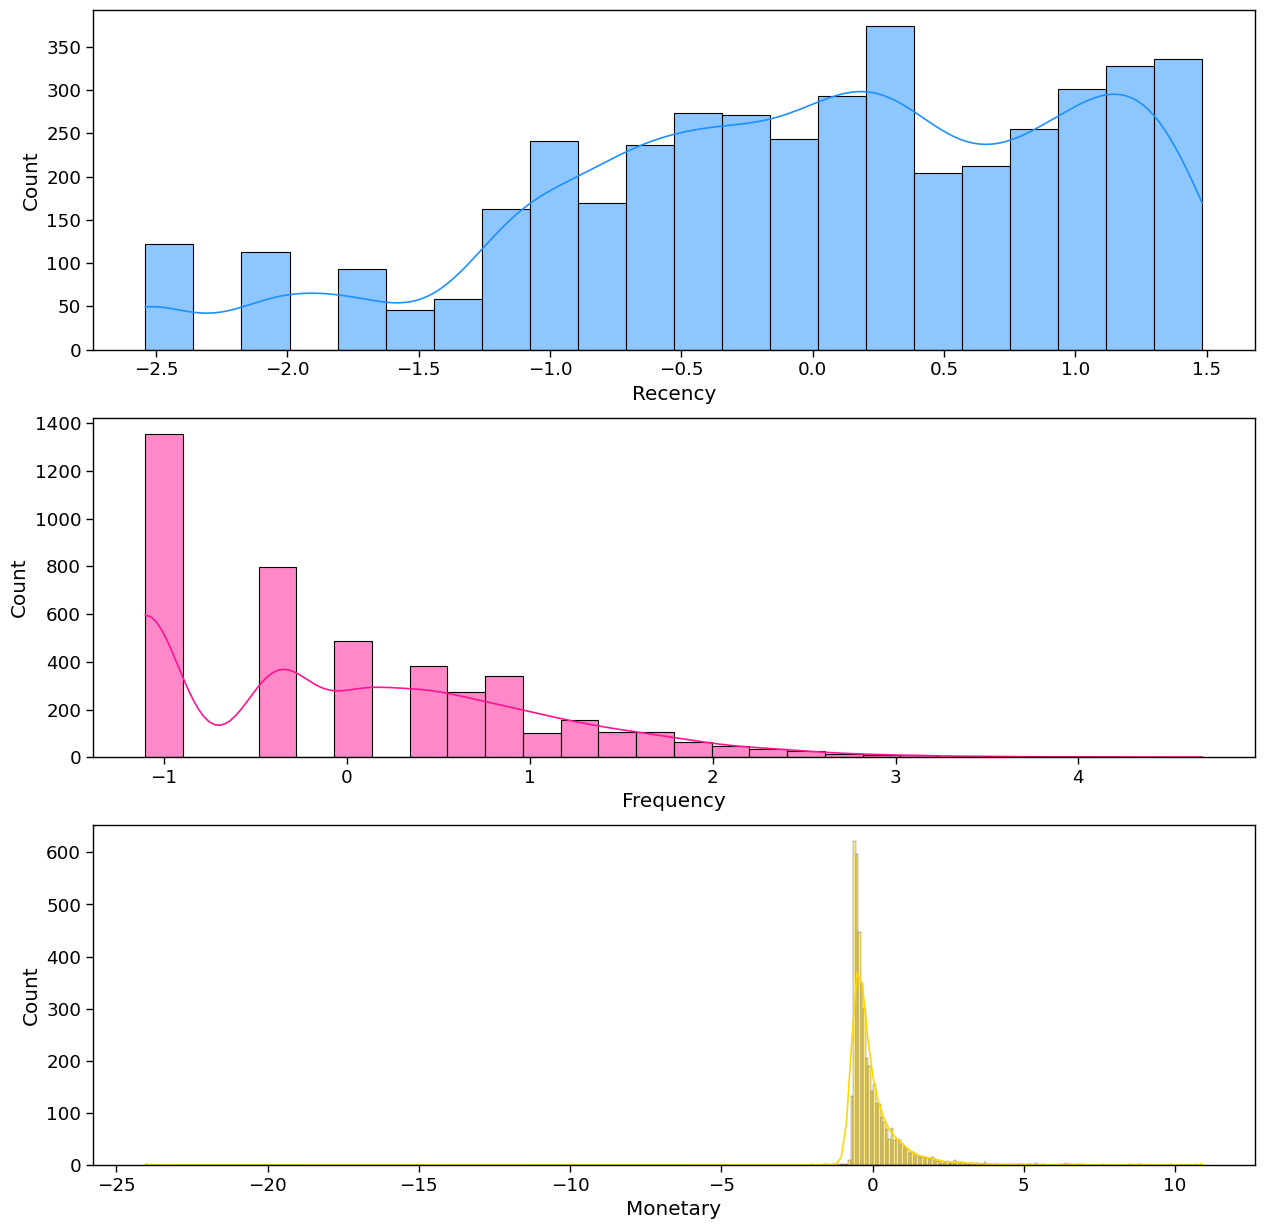

In [162]:
# Distribution plot
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot using histplot instead of distplot
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

sns.histplot(normal_df['Recency'], color="dodgerblue", kde=True, ax=axes[0])
axes[0].set_xlabel('Recency')

sns.histplot(normal_df['Frequency'], color="deeppink", kde=True, ax=axes[1])
axes[1].set_xlabel('Frequency')

sns.histplot(normal_df['Monetary'], color="gold", kde=True, ax=axes[2])
axes[2].set_xlabel('Monetary')

plt.show()

<font face="Arial" size="2">We can see that the means and averages of each distribution are now roughly uniform. This makes the data suitable for an unsupervised algorithm like K-Means. Let's begin by using the elbow method to determine the optimal number of clusters for segmenting customers based on their spending patterns.</font>

<font size="Arial" size="2"><b>b. Determine the optimal number of clusters to create.</b>

<b>b 1. Within Cluster Sum of Squares (WCSS)</b><br>
Within-Cluster Sum of Squares (WCSS) is a measure used to evaluate the compactness of clusters in a K-Means clustering algorithm. It calculates the sum of squared distances between each data point and the centroid of its assigned cluster. A lower WCSS indicates that the clusters are more compact, meaning the data points within each cluster are closer to the centroid. </font>

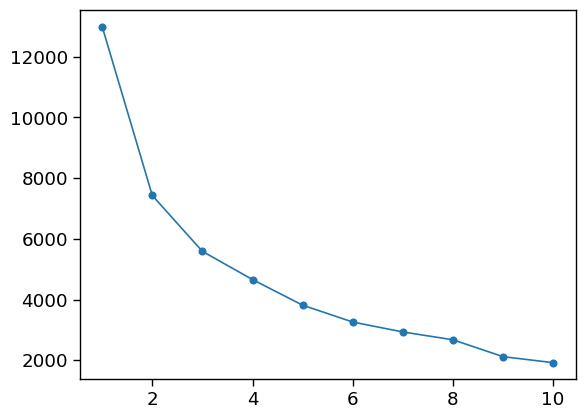

In [164]:
# find WCSS 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(normal_df)
    wcss.append(kmeans.inertia_)

# plot elbow graph
plt.plot(range(1,11),wcss,marker='o');

<font face="Arial" size="2"><b>b 2. Silhouette Score</b><br>
Silhouette Score is a metric used to evaluate the quality of clusters formed by a clustering algorithm. It measures how similar each point is to its own cluster compared to other clusters. </font>

Silhouette score for number of cluster(s) 3: 0.3947454614514734
Silhouette score for number of cluster(s) 4: 0.35029389261655114
Silhouette score for number of cluster(s) 5: 0.3524279208821107
Silhouette score for number of cluster(s) 6: 0.36266394645573724
Silhouette score for number of cluster(s) 7: 0.35879148354554596
Silhouette score for number of cluster(s) 8: 0.351348240132749
Silhouette score for number of cluster(s) 9: 0.34716159086447285
Silhouette score for number of cluster(s) 10: 0.34916279400345485
Silhouette score for number of cluster(s) 11: 0.35569552413540945


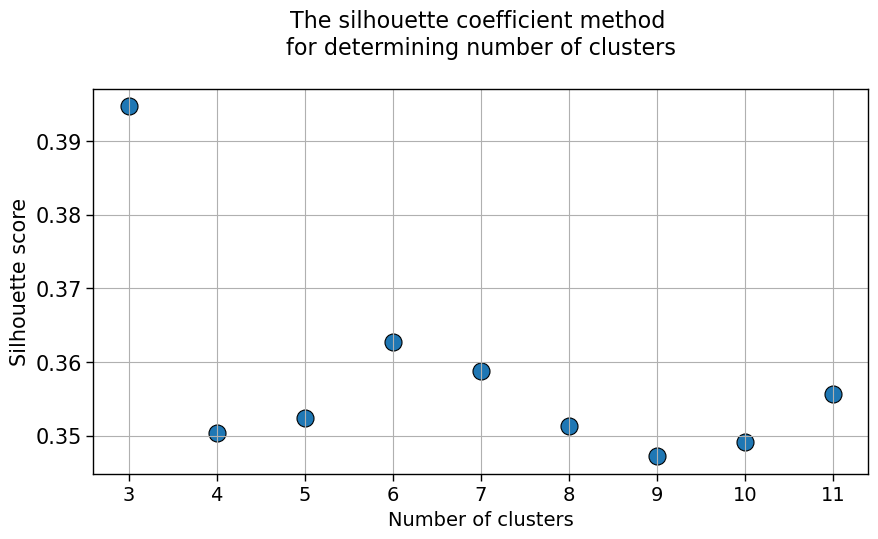

In [166]:
from sklearn.metrics import silhouette_score
wcss_silhouette = []
for i in range(3,12):
    km = KMeans(n_clusters=i, random_state=0,init='k-means++').fit(normal_df)
    preds = km.predict(normal_df)    
    silhouette = silhouette_score(normal_df,preds)
    wcss_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

plt.figure(figsize=(10,5))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(3,12)],y=wcss_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(3,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [168]:
kmeans = KMeans(n_clusters=6, random_state=1, init='k-means++')
kmeans.fit(normal_df)
cluster_labels = kmeans.labels_

In [170]:
kmeans

KMeans(n_clusters=6, random_state=1)

In [172]:
print(f"Shape of cluster label array is {cluster_labels.shape}")
print(f"Shape of RFM segment dataframe is {rfm_segment.shape}")

Shape of cluster label array is (4331,)
Shape of RFM segment dataframe is (4331, 9)


In [174]:
# Assign the clusters as column to each customer
Cluster_table = rfm_segment.assign(Cluster = cluster_labels)

In [176]:
# Check counts of records assigned to different clusters
Cluster_table.Cluster.value_counts()

Cluster
2    1056
4     994
0     880
5     829
3     404
1     168
Name: count, dtype: int64

In [178]:
Cluster_table.sample(10)
print ("Platinum customers belong to cluster                      : {} ".format(Cluster_table[Cluster_table['Segment']=='Platinum Customers']['Cluster'].unique()))
print ("Big Spenders belong to cluster                            : {} ".format(Cluster_table[Cluster_table['Segment']=='Big Spenders']['Cluster'].unique()))
print ("High Spend new Customers belong to cluster                : {} ".format(Cluster_table[Cluster_table['Segment']=='High Spend New Customers']['Cluster'].unique()))
print ("Lowest-Spending Active Loyal Customers belong to cluster  : {} ".format(Cluster_table[Cluster_table['Segment']=='Lowest-Spending Active Loyal Customers']['Cluster'].unique()))
print ("Recent Customers belong to cluster                        : {} ".format(Cluster_table[Cluster_table['Segment']=='Recent Customers']['Cluster'].unique()))
print ("Good Customers Almost Lost belong to cluster              : {} ".format(Cluster_table[Cluster_table['Segment']=='Good Customers Almost Lost']['Cluster'].unique()))
print ("Churned Best Customers belong to cluster                  : {} ".format(Cluster_table[Cluster_table['Segment']=='Churned Best Customers']['Cluster'].unique()))
print ("Lost Cheap customers belong to cluster                    : {} ".format(Cluster_table[Cluster_table['Segment']=='Lost Cheap Customers ']['Cluster'].unique()))

Platinum customers belong to cluster                      : [3 5 1] 
Big Spenders belong to cluster                            : [5 2 0 4 1 3] 
High Spend new Customers belong to cluster                : [0] 
Lowest-Spending Active Loyal Customers belong to cluster  : [0 3 5 2] 
Recent Customers belong to cluster                        : [3 0 5] 
Good Customers Almost Lost belong to cluster              : [2 5] 
Churned Best Customers belong to cluster                  : [2] 
Lost Cheap customers belong to cluster                    : [4 2 0] 


<font face="Arial" size="2"> Below results show customers in each cluster more closely</font>

In [180]:
Cluster_table[Cluster_table.Cluster == 5].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
146,12530.0,50,5,1623.63,2,3,4,234,Big Spenders,5
2554,15826.0,42,4,1649.36,3,3,4,334,Big Spenders,5
1299,14112.0,13,12,2774.17,4,4,4,444,Platinum Customers,5
1140,13890.0,9,11,1344.66,4,4,3,443,Platinum Customers,5
1461,14342.0,12,6,607.71,4,4,2,442,Recent Customers,5


In [182]:
Cluster_table[Cluster_table.Cluster == 4].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
3712,17436.0,217,1,122.40,1,1,1,111,Lost Cheap Customers,4
836,13474.0,227,1,226.84,1,1,1,111,Lost Cheap Customers,4
3749,17492.0,239,1,374.57,1,1,2,112,Lost Cheap Customers,4
2166,15303.0,281,1,574.02,1,1,2,112,Lost Cheap Customers,4
2754,16114.0,161,1,135.75,1,1,1,111,Lost Cheap Customers,4


In [184]:
Cluster_table[Cluster_table.Cluster == 3].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
2801,16173.0,6,7,1406.57,4,4,3,443,Platinum Customers,3
3242,16775.0,1,11,1691.51,4,4,4,444,Platinum Customers,3
2737,16094.0,2,6,1041.83,4,4,3,443,Platinum Customers,3
464,12948.0,7,8,2053.70,4,4,4,444,Platinum Customers,3
2099,15218.0,1,11,5756.89,4,4,4,444,Platinum Customers,3


In [186]:
Cluster_table[Cluster_table.Cluster == 2].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
1022,13731.0,210,2,610.59,1,2,2,122,Lost Cheap Customers,2
2911,16325.0,35,5,510.54,3,3,2,332,others,2
1974,15053.0,147,2,478.60,1,2,2,122,Lost Cheap Customers,2
537,13055.0,55,4,1201.96,2,3,3,233,Good Customers Almost Lost,2
1915,14970.0,59,4,1592.06,2,3,4,234,Big Spenders,2


In [188]:
Cluster_table[Cluster_table.Cluster == 1].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
1131,13881.0,2,21,16420.40,4,4,4,444,Platinum Customers,1
321,12744.0,42,10,9120.39,3,4,4,344,Big Spenders,1
1776,14769.0,68,9,10041.86,2,4,4,244,Big Spenders,1
104,12477.0,13,9,13117.01,4,4,4,444,Platinum Customers,1
1907,14961.0,1,12,7006.58,4,4,4,444,Platinum Customers,1


In [190]:
Cluster_table[Cluster_table.Cluster == 0].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
2041,15136.0,13,3,1025.55,4,2,3,423,Recent Customers,0
1924,14984.0,10,2,202.37,4,2,1,421,others,0
1677,14638.0,41,1,443.60,3,1,2,312,others,0
1786,14784.0,17,2,289.99,3,2,2,322,others,0
3802,17557.0,5,3,541.46,4,2,2,422,Recent Customers,0


<font size="Arial" size="2"><b>c. Scatter Plot to visualize the division of customers into different segments based on the RFM atributes.</b></font>

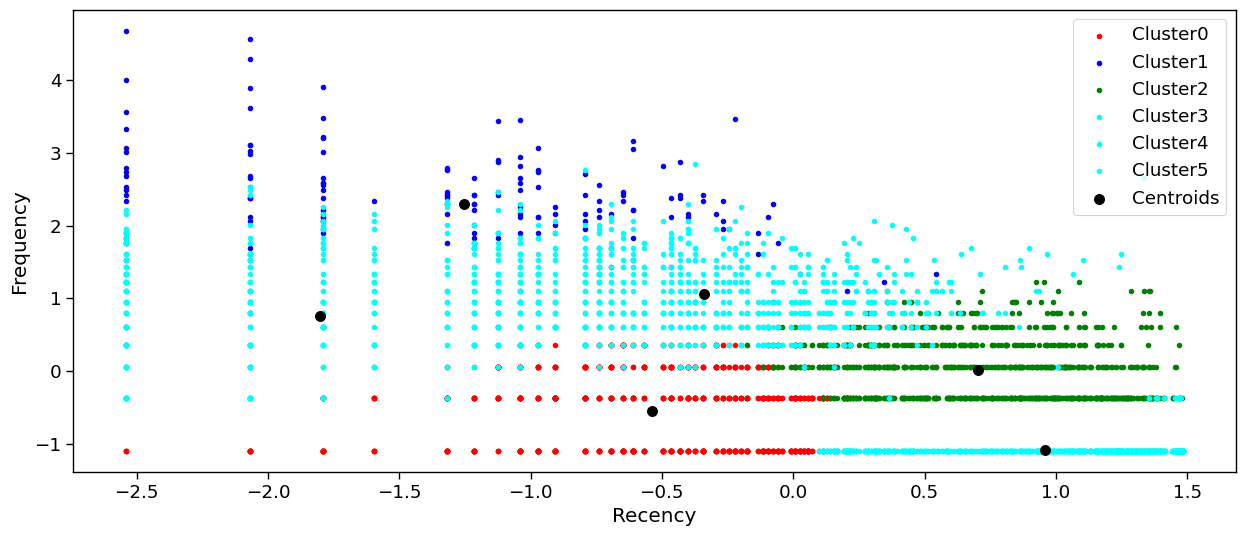

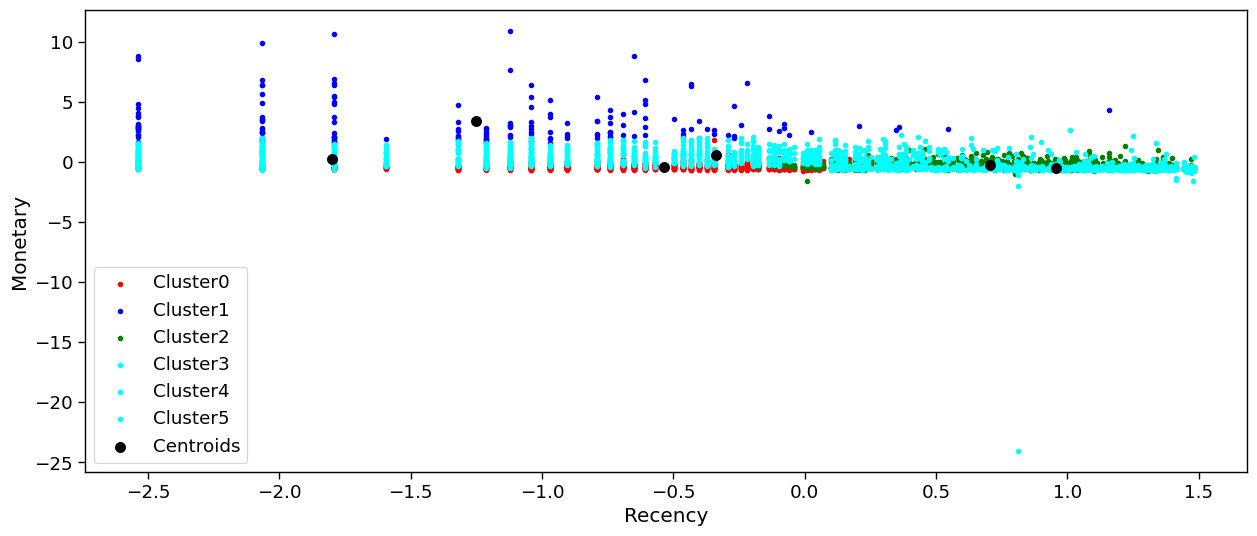

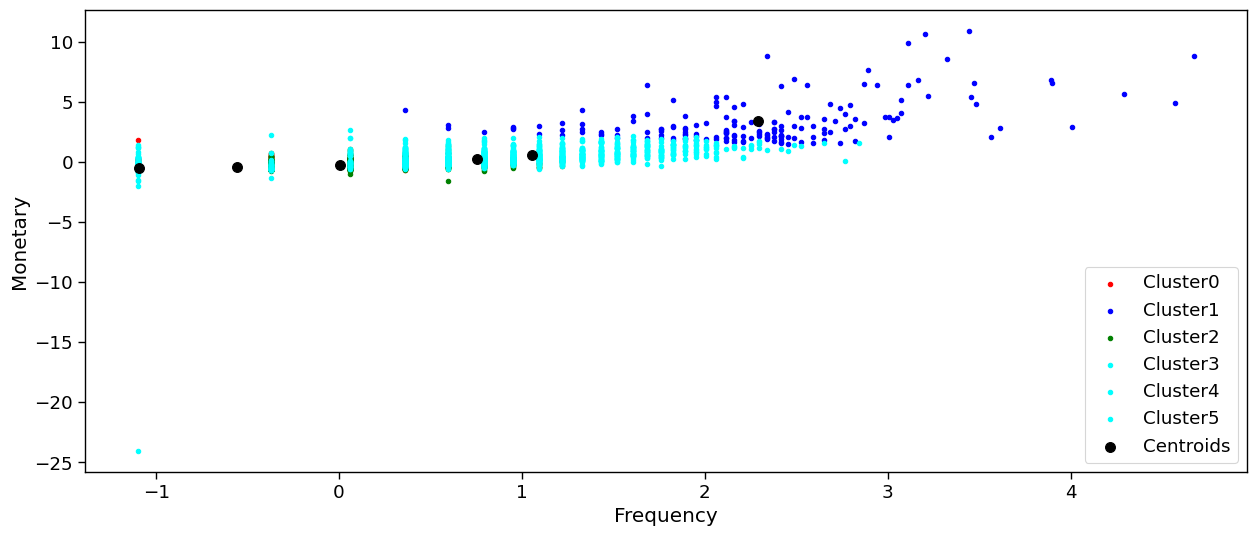

In [192]:
# Plotting two dimesional plots of each attributes respectively.
X = normal_df.iloc[:,0:3].values
count=X.shape[1]
for i in range(0,count):
    for j in range(i+1,count):
        plt.figure(figsize=(15,6));
        plt.scatter(X[cluster_labels == 0, i], X[cluster_labels == 0, j], s = 10, c = 'red', label = 'Cluster0')
        plt.scatter(X[cluster_labels == 1, i], X[cluster_labels == 1, j], s = 10, c = 'blue', label = 'Cluster1')
        plt.scatter(X[cluster_labels == 2, i], X[cluster_labels == 2, j], s = 10, c = 'green', label = 'Cluster2')
        plt.scatter(X[cluster_labels == 3, i], X[cluster_labels == 3, j], s = 10, c = 'cyan', label = 'Cluster3')
        plt.scatter(X[cluster_labels == 4, i], X[cluster_labels == 4, j], s = 10, c = 'cyan', label = 'Cluster4')
        plt.scatter(X[cluster_labels == 5, i], X[cluster_labels == 5, j], s = 10, c = 'cyan', label = 'Cluster5')
        plt.scatter(kmeans.cluster_centers_[:,i], kmeans.cluster_centers_[:,j], s = 50, c = 'black', label = 'Centroids')
        plt.xlabel(normal_df.columns[i])
        plt.ylabel(normal_df.columns[j])
        plt.legend()        
        plt.show();

In [194]:
Cluster_table.to_excel("C:/Users/User/OneDrive/Desktop/Capstone_Cust_Segmentation/RFMSegment.xlsx")

<font face="Arial" size="3"><b>Heat Map</b><br>
We will use a heat map to visualize the relative importance of each attribute across the four customer segments (clusters). The importance score is calculated by dividing the attribute value for each cluster by the overall population average, and then subtracting 1 (which ensures a score of 0 when the cluster average equals the population average).

The greater the deviation from 0, the more significant that attribute is for the segment in comparison to the overall population.</font>

In [196]:
# Assign Cluster labels to RFM table
rfm_table_cluster = rfm_table.assign(Cluster = cluster_labels)

# Average attributes for each cluster
cluster_avg = rfm_table_cluster.groupby(['Cluster']).mean() 

# Calculate the population average
population_avg = rfm_table.mean()

# Calculate relative importance of attributes by 
relative_imp = cluster_avg / population_avg - 1

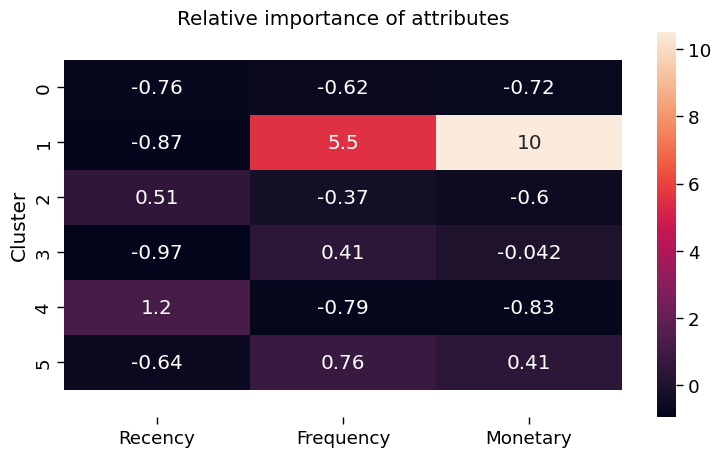

In [198]:
plt.figure(figsize=(9, 5))
plt.title('Relative importance of attributes')

ax = sns.heatmap(relative_imp, annot=True) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#plt.tight_layout()
#plt.gcf().subplots_adjust(bottom=0.15)
plt.show();

<font face="Arial" size="3"> 7. Future Steps (To Do) </font>

<b>Technical Tasks to Do:</b>
<li>Cluster Validation:</li>
<div style="padding-left: 20px;"> <li> Fine-tune the number of clusters using advanced techniques like the Gap Statistic. </li></div><br>

<li>Model Optimization:</li>
<div style="padding-left: 20px;"> <li> Implement advanced clustering algorithms such as DBSCAN or Gaussian Mixture Models (GMM) for comparison. </li></div>
<div style="padding-left: 20px;"> <li> Tune the hyperparameters of the K-Means algorithm for improved cluster quality. </li></div><br>

<li>Personalized Marketing Strategy:</li>
<div style="padding-left: 20px;"> <li> Create targeted marketing strategies for each segment based on cluster profiles. </li></div>
<div style="padding-left: 20px;"> <li> Develop personalized offers, promotions, and content tailored to each customer group. </li></div><br>

<li>Real-time Implementation:</li>
<div style="padding-left: 20px;"> <li> Implement the segmentation model into a real-time system to dynamically update customer segments as new data arrives.</li></div>

<br>

<b>Conceptual/Technical Limitations:</b>
<li>Data Quality Issues:</li>
<div style="padding-left: 20px;"> <li> Clustering model relies heavily on the quality and completeness of the data. Missing, incomplete, or inaccurate data can lead to suboptimal segmentation. </li></div><br>

<li>Cluster Interpretability:</li>
<div style="padding-left: 20px;"> <li> While clustering provides groups, interpreting the meaning behind each cluster may not always be straightforward and may require domain knowledge or further analysis. </li></div><br>

<li>Dynamic Nature of Customer Behavior:</li>
<div style="padding-left: 20px;"> <li>Customer behaviors may change over time, requiring continuous monitoring and updating of the segmentation model. Static models may not capture evolving trends. </li></div><br>

<br>

<b>Scope for Further Extensions:</b>
<li>Incorporating More Features:</li>
<div style="padding-left: 20px;"> <li>Include more customer attributes such as demographics, purchasing history, and engagement metrics to refine the segmentation. </li></div><br>

<li>Cross-Cluster Marketing Strategies:</li>
<div style="padding-left: 20px;"> <li>Explore marketing strategies that target customers across multiple segments, leveraging overlapping characteristics to increase engagement.</li></div><br>

<li>Dynamic Real-Time Analytics:</li>
<div style="padding-left: 20px;"> <li>Enhance the model to provide real-time insights and dynamically update segments as customers engage with marketing campaigns, website, or app interactions. </li></div><br>

<li>A/B Testing and Feedback Loop:</li>
<div style="padding-left: 20px;"> <li>Implement A/B testing for personalized marketing strategies, using feedback to continually refine and improve segmentation models and marketing tactics.</li></div><br>




<font face="Arial" size="3"> 8. References </font>

<b>Data Sources:</b><br>
Dataset : https://www.kaggle.com/datasets/sachinkumar27oct/online-retail-xlsx?resource=download

<b>Articles, Links, etc. used:</b>
<li>Article on Customer Segmentation</li>
<div style="padding-left: 20px;">1. <a href="URL">https://ideascale.com/blog/what-is-customer-segmentation</a></div>

<li>RFM Analysis </li>
<div style="padding-left: 20px;">1. <a href="URL">https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python</a></div>
<div style="padding-left: 20px;">2. <a href="URL">https://www.edstellar.com/blog/rfm-analysis</a></div>

<li>K-Means Clustering </li>
<div style="padding-left: 20px;">1. <a href="URL">https://www.geeksforgeeks.org/k-means-clustering-introduction</a></div>
<div style="padding-left: 20px;">2. <a href="URL">https://www.w3schools.com/python/python_ml_k-means.asp</a></div>
<div style="padding-left: 20px;">3. <a href="URL">https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb</a></div>
